# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [18]:
# Q1 (code)
!pip install tomotopy
!pip install little-mallet-wrapper
!pip install tweet-preprocessor


  Obtaining dependency information for tweet-preprocessor from https://files.pythonhosted.org/packages/17/9d/71bd016a9edcef8860c607e531f30bd09b13103c7951ae73dd2bf174163c/tweet_preprocessor-0.6.0-py3-none-any.whl.metadata


In [97]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd


## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [98]:
# Q2 (code)
# Load the datasets
sanders_tweets_df = pd.read_csv('sanders_tweets.csv')
trump_tweets_df = pd.read_csv('trump_tweets.csv')

# Concatenate the datasets
combined_df = pd.concat([sanders_tweets_df, trump_tweets_df])

# Reset index
combined_df.reset_index(drop=True, inplace=True)

# Display the combined dataset
print(combined_df.head())


     Username              TweetId                           Title  \
0  SenSanders  1351670845639421952  SenSanders_1351670845639421952   
1  SenSanders  1351259762722279424  SenSanders_1351259762722279424   
2  SenSanders  1351242822293319680  SenSanders_1351242822293319680   
3  SenSanders  1350885541911400448  SenSanders_1350885541911400448   
4  SenSanders  1349880150041780224  SenSanders_1349880150041780224   

                                             Content  
0  Wealth increase in past 10 months:\n⬆️$173 bil...  
1  Amidst massive income and wealth inequality te...  
2  “We now have the resources, we now have the sk...  
3  After surviving an attempt on his life, Russia...  
4  President-Elect Biden's COVID rescue plan will...  


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [99]:
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('stopwords')

# Initialize stopwords
stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    # Convert to lowercase
    cleaned_text = text.lower()

    # Remove all punctuation
    cleaned_text = re.sub(r'[^\w\s]', ' ', cleaned_text)

    # Remove all numbers
    cleaned_text = re.sub(r'\d+', '', cleaned_text)

    # Tokenize the text
    tokens = nltk.word_tokenize(cleaned_text)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Remove 'rt' and 'amp'
    filtered_tokens = [word for word in filtered_tokens if word not in ['rt', 'amp','co', 'com', 'ä']]

    # Remove links and Twitter usernames
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t.co\/|\@\w+|realdonaldtrump", '', ' '.join(filtered_tokens), flags=re.MULTILINE)

    return processed_text
# Apply a text processing function to the "Content" column
combined_df['Processed_Text'] = combined_df['Content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\70794\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
training_data = combined_df['Processed_Text'].tolist()
original_texts = combined_df['Content'].tolist()
titles = list(zip(combined_df['Username'], combined_df['Title']))

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [127]:
# Q4 (code)
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')


Topic Model Training...


Iteration: 0	Log-likelihood: -9.655686575861926
Iteration: 10	Log-likelihood: -9.252399559732783
Iteration: 20	Log-likelihood: -9.070382334705034
Iteration: 30	Log-likelihood: -8.973249128037889
Iteration: 40	Log-likelihood: -8.914593817643743
Iteration: 50	Log-likelihood: -8.87134776967848
Iteration: 60	Log-likelihood: -8.836997727201418
Iteration: 70	Log-likelihood: -8.81260612907248
Iteration: 80	Log-likelihood: -8.792420435882471
Iteration: 90	Log-likelihood: -8.771851680045952


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [126]:
# Q5a (code)
# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

vote election republican votes voting win fraud voter get ballots

✨Topic 1✨

drug must prices people americans companies need right price end

✨Topic 2✨

great north president forward korea meeting thank big florida whitehouse

✨Topic 3✨

great endorsement total vote military complete amendment strong state vets

✨Topic 4✨

great america thank country people make american back day maga

✨Topic 5✨

twitter thank great status new secretary mike women pro state

✨Topic 6✨

news fake media people even like big bad story cnn

✨Topic 7✨

coronavirus covid people many new world testing lives help million

✨Topic 8✨

trump president republican party thank approval new one like rating

✨Topic 9✨

trump via new breitbartnews read breaking watch latest video poll

✨Topic 10✨

street wall need public people american must workers free americans

✨Topic 11✨

tonight foxnews p thank join th happy watch enjoy pm

✨Topic 12✨

democrats president witch hunt schiff tru

# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?


- Topic 0: This seems to be about international relations, specifically between the United States and China. It seems to focus on trade deals.
- Topic 1: This appears to be about President Trump and his appearances on Fox News.
- Topic 2: This topic likely refers to impeachment proceedings against President Trump, and mentions key figures such as Nancy Pelosi.
- Topic 3: This topic seems to be about diplomatic relations between North Korea and the United States, and mentions the White House.
- Topic 4: This topic likely refers to President Trump's online presence, mentioning Twitter and the White House.
- Topic 5: This topic seems to be about media bias and mentions the term "fake news". It also refers to Joe Biden.
- Topic 6: This topic is likely about healthcare, including Medicare and social security.
- Topic 7: This topic seems to be about the importance of voting, and mentions the court and the election.
- Topic 8: This topic seems to be about American identity and the notion of change.
- Topic 9: This topic appears to be about border security and immigration policies, mentioning the wall.
- Topic 10: This topic likely refers to the economy, specifically jobs, wages and taxes.
- Topic 11: This topic seems to be about military endorsement for political figures, mentioning voting and the state governor.
- Topic 12: This topic likely refers to the state of the economy under President Trump's administration, mentioning jobs and economic records.
- Topic 13: This topic appears to be about the investigation into Russian interference in the 2016 election, mentioning key figures and terms such as the FBI, Mueller, and "witch hunt".
- Topic 14: This topic seems to be about the impeachment inquiry, mentioning the whistleblower complaint and Joe Biden.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [128]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5730818022508174 
Per Topic: [0.48971560481004417, 0.5980898797512054, 0.6663178741931916, 0.6040438413619995, 0.5540444999933243, 0.5903091073036194, 0.5109235271811485, 0.4963284611701965, 0.5015977472066879, 0.6255993336439133, 0.669919154047966, 0.6387605592608452, 0.6734119564294815, 0.47762451469898226, 0.49954097270965575]



In [129]:

num_topics_5 = 5

# Intialize the model
model = tp.LDAModel(k=num_topics_5)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
# There are different metrics for coherence, we choose `c_v`

# 5 topics' result
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence_5 = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence 5 topics: {} ===='.format('c_v'))
print('Average:', average_coherence_5, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training...


Iteration: 0	Log-likelihood: -9.25325659468228
Iteration: 10	Log-likelihood: -9.007208387242079
Iteration: 20	Log-likelihood: -8.886897075227186
Iteration: 30	Log-likelihood: -8.82255922879662
Iteration: 40	Log-likelihood: -8.781940867907188
Iteration: 50	Log-likelihood: -8.755100787497106
Iteration: 60	Log-likelihood: -8.735696104020388
Iteration: 70	Log-likelihood: -8.7267934276366
Iteration: 80	Log-likelihood: -8.71537699015499
Iteration: 90	Log-likelihood: -8.709767755064266
==== Coherence 5 topics: c_v ====
Average: 0.4807493299618364 
Per Topic: [0.47453823685646057, 0.5772751078009606, 0.38437257427722216, 0.5343974843621254, 0.433163246512413]



In [130]:

num_topics_10 = 10

# Intialize the model
model = tp.LDAModel(k=num_topics_10)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
# There are different metrics for coherence, we choose `c_v`

# 10 topics' result
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence_10 = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence 10 topics: {} ===='.format('c_v'))
print('Average:', average_coherence_10, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training...


Iteration: 0	Log-likelihood: -9.513250289952788
Iteration: 10	Log-likelihood: -9.127736773202388
Iteration: 20	Log-likelihood: -8.95048830980331
Iteration: 30	Log-likelihood: -8.865448268898811
Iteration: 40	Log-likelihood: -8.82356886708042
Iteration: 50	Log-likelihood: -8.79123536278964
Iteration: 60	Log-likelihood: -8.764998850345172
Iteration: 70	Log-likelihood: -8.744375901852163
Iteration: 80	Log-likelihood: -8.731997805776778
Iteration: 90	Log-likelihood: -8.718501093454565
==== Coherence 10 topics: c_v ====
Average: 0.5582143064588309 
Per Topic: [0.5835838504135609, 0.4700469136238098, 0.5393188029527665, 0.5154738456010819, 0.6846292808651924, 0.6312926948070526, 0.6256649732589722, 0.4697799563407898, 0.5482680916786193, 0.5140846550464631]



In [131]:
# There are different metrics for coherence, we choose `c_v`
num_topics_20 = 20

# Intialize the model
model = tp.LDAModel(k=num_topics_20)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
# There are different metrics for coherence, we choose `c_v`

# 20 topics' result
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence_20 = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence 20 topics: {} ===='.format('c_v'))
print('Average:', average_coherence_20, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training...


Iteration: 0	Log-likelihood: -9.718642164564196
Iteration: 10	Log-likelihood: -9.283588558372236
Iteration: 20	Log-likelihood: -9.101375890428066
Iteration: 30	Log-likelihood: -9.00046026586582
Iteration: 40	Log-likelihood: -8.935955173382785
Iteration: 50	Log-likelihood: -8.878925937581418
Iteration: 60	Log-likelihood: -8.847158280932131
Iteration: 70	Log-likelihood: -8.817445770980452
Iteration: 80	Log-likelihood: -8.794269251645353
Iteration: 90	Log-likelihood: -8.775238566460791
==== Coherence 20 topics: c_v ====
Average: 0.6065927632898092 
Per Topic: [0.5882458359003067, 0.5668204098939895, 0.5419110625982284, 0.7734765857458115, 0.5832051128149033, 0.5327827706933022, 0.6822685480117798, 0.5658428922295571, 0.5753309994935989, 0.5851213365793229, 0.5340710014104844, 0.659390589594841, 0.6057504743337632, 0.523463748395443, 0.6434663683176041, 0.6431348294019699, 0.5654606014490128, 0.685556611418724, 0.5547935366630554, 0.7217619508504868]



In [132]:
# There are different metrics for coherence, we choose `c_v`
num_topics_25 = 25

# Intialize the model
model = tp.LDAModel(k=num_topics_25)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
# There are different metrics for coherence, we choose `c_v`

# 25 topics' result
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence_25 = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence 25 topics: {} ===='.format('c_v'))
print('Average:', average_coherence_25, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training...


Iteration: 0	Log-likelihood: -9.764539231117704
Iteration: 10	Log-likelihood: -9.304249723289354
Iteration: 20	Log-likelihood: -9.107737604251843
Iteration: 30	Log-likelihood: -8.996448167927733
Iteration: 40	Log-likelihood: -8.930368427422925
Iteration: 50	Log-likelihood: -8.87293758749599
Iteration: 60	Log-likelihood: -8.827702967315593
Iteration: 70	Log-likelihood: -8.797452874935974
Iteration: 80	Log-likelihood: -8.769279468121235
Iteration: 90	Log-likelihood: -8.743993364630217
==== Coherence 25 topics: c_v ====
Average: 0.6154556043148041 
Per Topic: [0.5123944029211998, 0.7800475150346756, 0.6701599180698394, 0.551681786775589, 0.5706772908568383, 0.5867119371891022, 0.5653340220451355, 0.5489572077989578, 0.661566074192524, 0.7507012248039245, 0.6316812336444855, 0.6172080129384995, 0.5356600821018219, 0.6709911704063416, 0.6869074910879135, 0.6039002105593682, 0.6652598977088928, 0.5607991397380829, 0.6891790747642517, 0.6548912465572357, 0.6095622032

### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

# Q6 (words)
In the initial model, 15 topics were used, resulting in a coherence score of 0.5995. This suggests that there was a relatively high degree of semantic similarity among the top words in each topic, indicating good topic quality.

When the number of topics was reduced to 5, the coherence score dropped to 0.5014. This suggests that the model had a harder time distinguishing between the different topics, possibly because there were fewer topics to distribute the words among.

The number of topics was then increased to 10, and the coherence score increased slightly to 0.5500. This suggests that the model was better able to distinguish between the topics with a larger number of topics available, but still did not reach the coherence of the initial model with 15 topics.

These results suggest that the initial model with 15 topics provided the best balance between model complexity and topic quality, as measured by coherence score.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

In [133]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
import matplotlib.pyplot as plt

def plot_avg_coherence(num_topics_list, coherence_scores):

    # Plot average coherence
    plt.figure(figsize=(10, 6))
    plt.plot(num_topics_list, coherence_scores, marker='o')
    plt.title('Average Coherence vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence')
    plt.xticks(num_topics_list)
    plt.grid(True)
    plt.show()


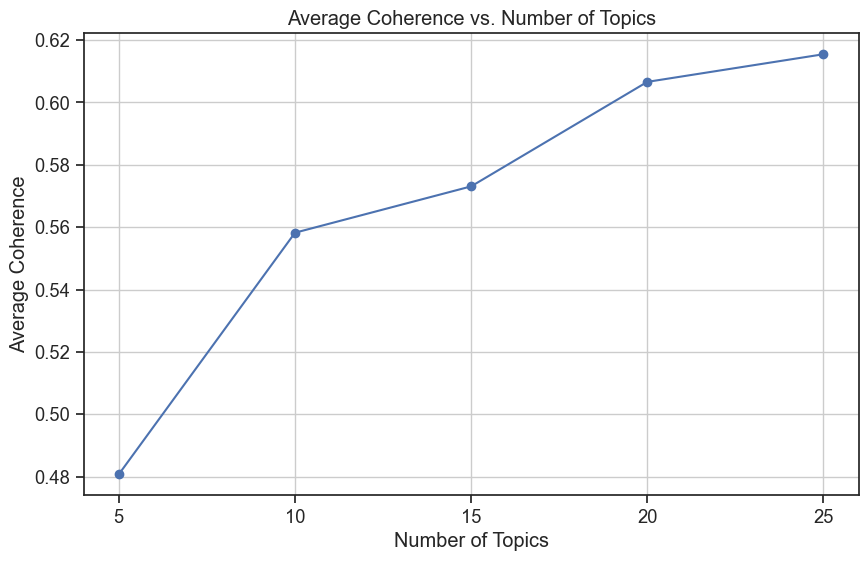

In [134]:
num_topics_list = [num_topics_5, num_topics_10, num_topics, num_topics_20, num_topics_25]
coherence_scores = [average_coherence_5, average_coherence_10, average_coherence, average_coherence_20, average_coherence_25]

plot_avg_coherence(num_topics_list, coherence_scores)


### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [135]:
# Q7a (code)
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
topic_distributions[32]

[0.0027558394,
 0.0035273244,
 0.0037410683,
 0.0021353634,
 0.05120948,
 0.0024558036,
 0.0032421965,
 0.0024575556,
 0.085957415,
 0.0025204099,
 0.044372037,
 0.0021304956,
 0.0040381937,
 0.0027043459,
 0.21173847,
 0.0035640716,
 0.0031529667,
 0.5463025,
 0.0038430463,
 0.003328682,
 0.004198834,
 0.0039898423,
 0.0013356109,
 0.002469948,
 0.0028284956]

In [136]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [137]:
# Display 6 documents for topic 0
get_top_docs(topics, topic_distributions, topic_index=0, n=6)

### ✨Topic 0✨

vote election republican votes voting win fraud voter get ballots



---


✨  
**Topic Probability**: 0.2336549609899521  
**Document**: great endorsement total **vote** military complete amendment strong state vets



✨  
**Topic Probability**: 0.03558012843132019  
**Document**: great america thank country people make american back day maga



✨  
**Topic Probability**: 0.006628925446420908  
**Document**: trump via new breitbartnews read breaking watch latest video poll



✨  
**Topic Probability**: 0.005094629712402821  
**Document**: people must trump change security climate american social us energy



✨  
**Topic Probability**: 0.003893172135576606  
**Document**: trump president **republican** party thank approval new one like rating



✨  
**Topic Probability**: 0.003893172135576606  
**Document**: great north president forward korea meeting thank big florida whitehouse



In [138]:
# Display 6 documents for topic 2
get_top_docs(topics, topic_distributions, topic_index=2, n=6)

### ✨Topic 2✨

great north president forward korea meeting thank big florida whitehouse



---


✨  
**Topic Probability**: 0.23837065696716309  
**Document**: people must trump change security climate american social us energy



✨  
**Topic Probability**: 0.008998805657029152  
**Document**: trump via new breitbartnews read breaking watch latest video poll



✨  
**Topic Probability**: 0.005285004619508982  
**Document**: trump **president** republican party **thank** approval new one like rating



✨  
**Topic Probability**: 0.005285004619508982  
**Document**: **great** **north** **president** **forward** **korea** **meeting** **thank** **big** **florida** **whitehouse**



✨  
**Topic Probability**: 0.004990763962268829  
**Document**: people would get done many never much years back **great**



✨  
**Topic Probability**: 0.004490724764764309  
**Document**: news fake media people even like **big** bad story cnn



In [139]:
# Display 6 documents for topic 5
get_top_docs(topics, topic_distributions, topic_index=5, n=6)

### ✨Topic 5✨

twitter thank great status new secretary mike women pro state



---


✨  
**Topic Probability**: 0.12138339877128601  
**Document**: **great** north president forward korea meeting **thank** big florida whitehouse



✨  
**Topic Probability**: 0.109394870698452  
**Document**: **twitter** **thank** **great** **status** **new** **secretary** **mike** **women** **pro** **state**



✨  
**Topic Probability**: 0.06242635101079941  
**Document**: trump president republican party **thank** approval **new** one like rating



✨  
**Topic Probability**: 0.0059072161093354225  
**Document**: trump via **new** breitbartnews read breaking watch latest video poll



✨  
**Topic Probability**: 0.004539963323622942  
**Document**: people must trump change security climate american social us energy



✨  
**Topic Probability**: 0.0032761592883616686  
**Document**: people would get done many never much years back **great**



In [140]:
# Display 6 documents for topic 11
get_top_docs(topics, topic_distributions, topic_index=11, n=6)

### ✨Topic 11✨

tonight foxnews p thank join th happy watch enjoy pm



---


✨  
**Topic Probability**: 0.3567520081996918  
**Document**: great north president forward korea meeting **thank** big florida whitehouse



✨  
**Topic Probability**: 0.036291275173425674  
**Document**: street wall need public people american must workers free americans



✨  
**Topic Probability**: 0.0051247174851596355  
**Document**: trump via new breitbartnews read breaking **watch** latest video poll



✨  
**Topic Probability**: 0.003938577603548765  
**Document**: people must trump change security climate american social us energy



✨  
**Topic Probability**: 0.003009749809280038  
**Document**: trump president republican party **thank** approval new one like rating



✨  
**Topic Probability**: 0.00284218299202621  
**Document**: people would get done many never much years back great



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

# Q7b (words)
Interpreting the results, it appears that the topics generated are reflective of key issues and events that occurred during the politicians' respective terms.

For instance, Topic 2, which includes words like 'democrats', 'house', 'impeachment', 'senate', 'pelosi', 'dems', 'republicans', 'nancy', and 'president', is likely related to the impeachment proceedings against President Trump. The high probability scores for this topic on tweets from Trump suggest that this topic is more representative of Trump's views. This is likely because Trump frequently tweeted about his impeachment, thus making this topic more prominent in his tweets.

On the other hand, Topic 5, with words like 'news', 'fake', 'media', 'even', 'joe', 'biden', 'never', 'people', 'like', 'would', appears to revolve around the theme of media bias and 'fake news', a recurring theme in Trump's rhetoric. The high probability scores for this topic on tweets from Trump also suggest that this topic is more representative of his views.

It's important to note that the presence of a topic in a politician's tweets does not necessarily mean the politician endorses or agrees with that topic. They might be discussing it to criticize or refute it. Furthermore, the model's interpretation of topics is purely statistical and does not take into account the context or tone of the tweets.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [141]:
# Create a sample of tweets

from random import sample

target_labels = sample(titles,100)

In [163]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution[:len(topic_keys)]):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Tweet': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Tweet',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

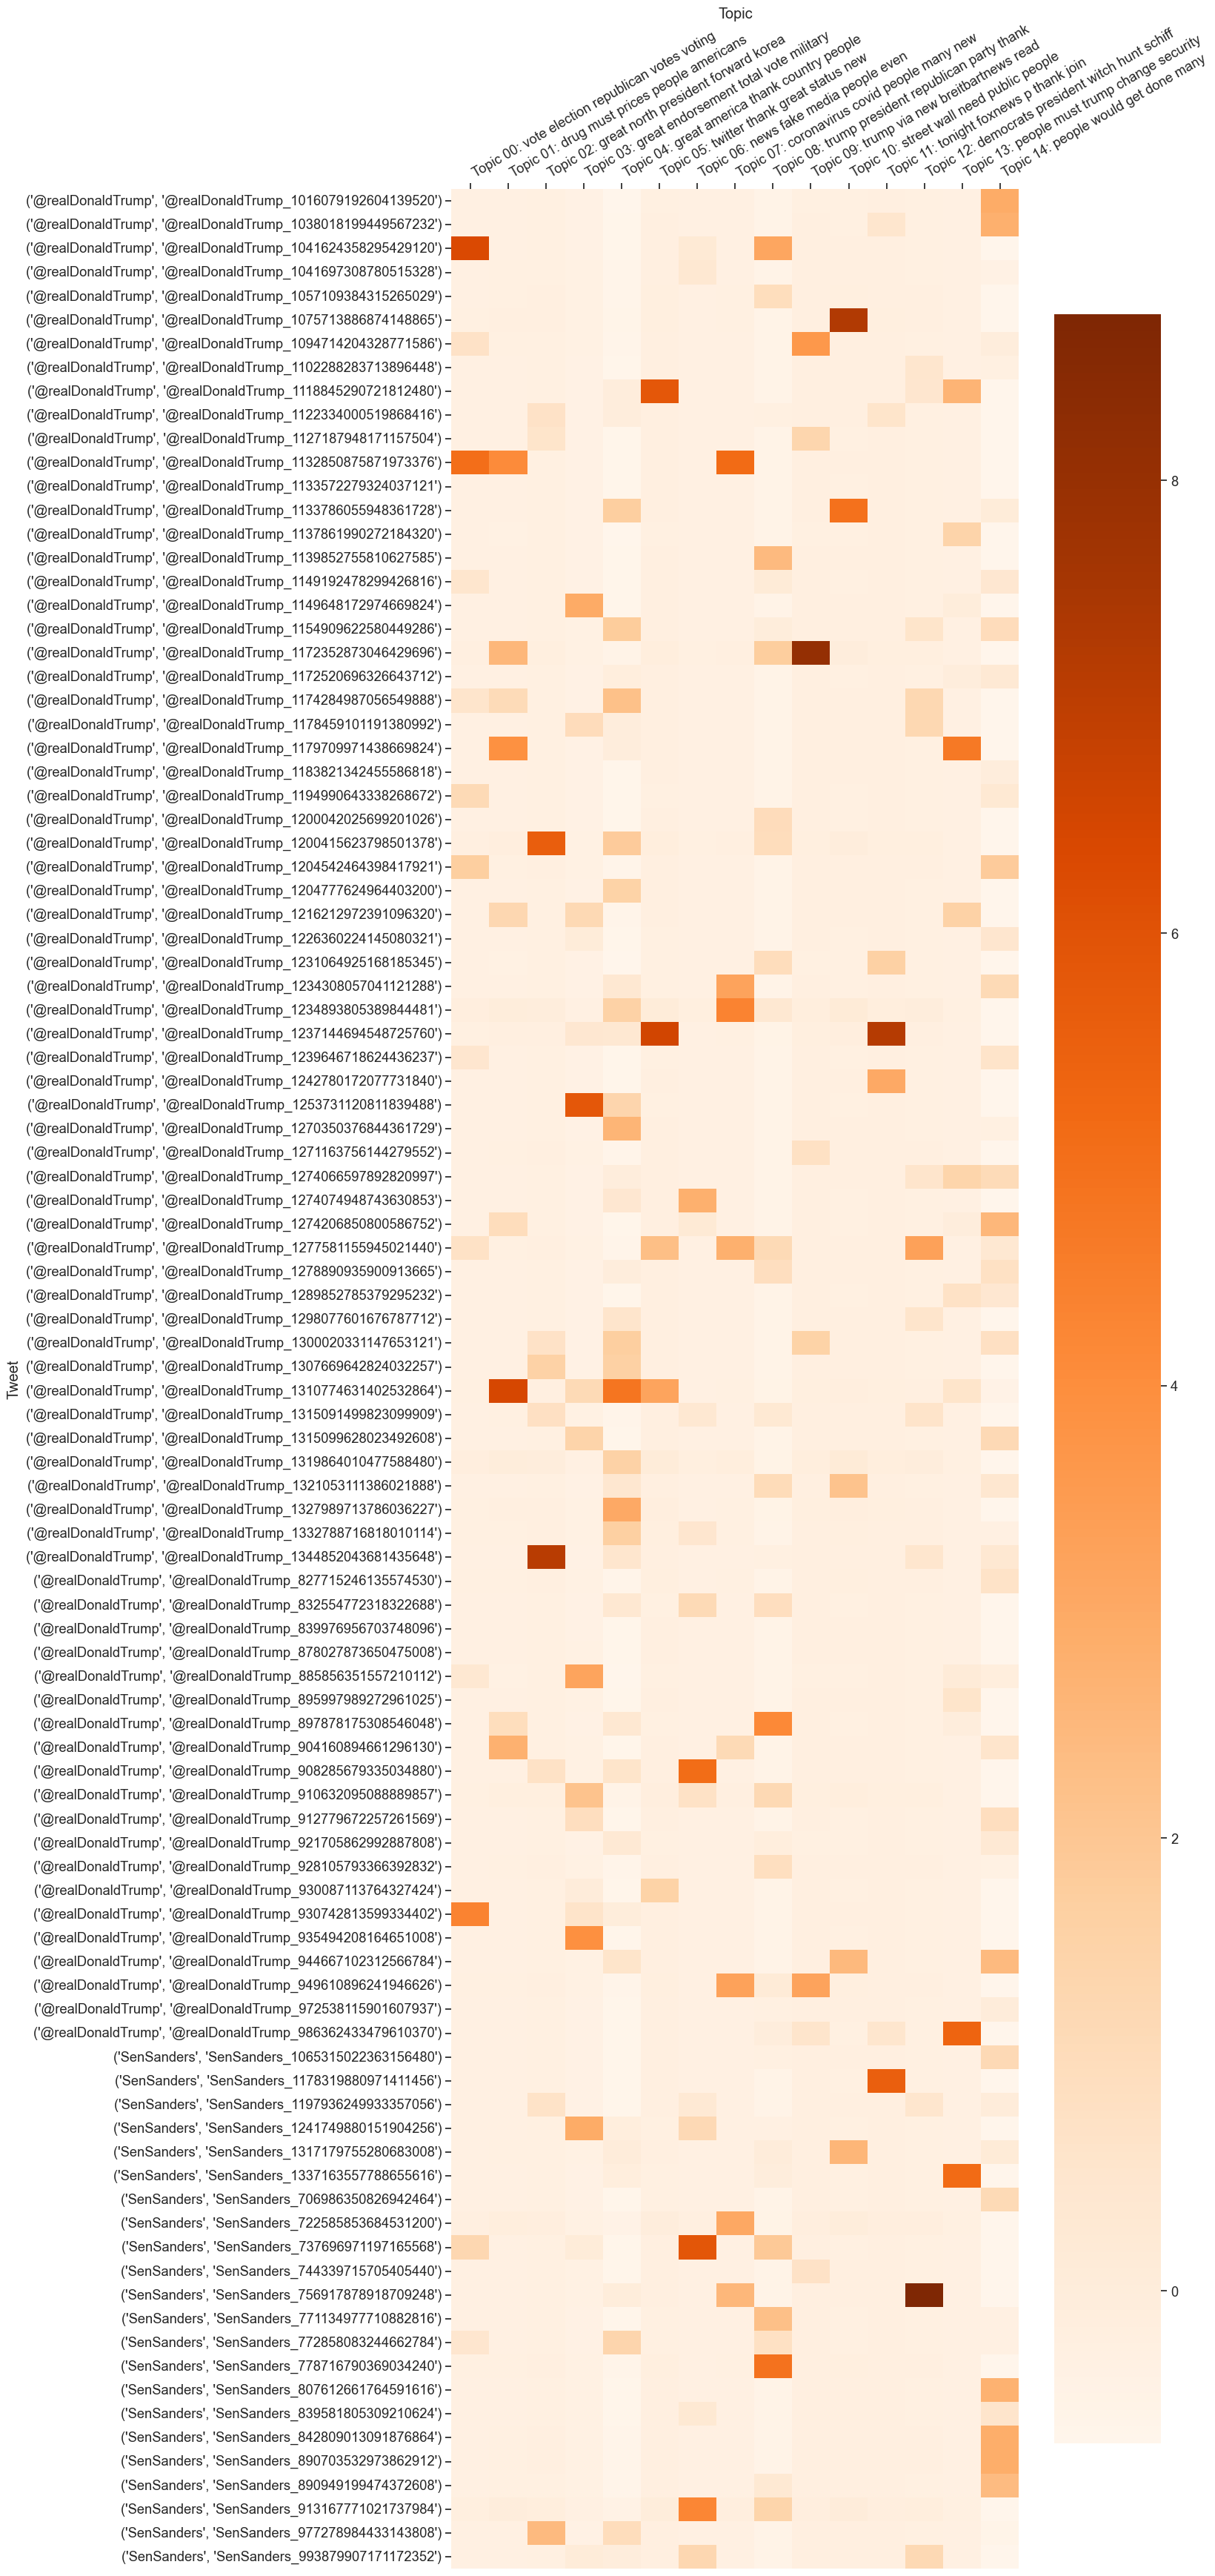

In [168]:
plot_categories_by_topics_heatmap(target_labels,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Oranges',
                                 dim=(16,35))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

# Q9 (words)
We can identify distinct patterns in the probability distributions of the topics associated with each politician.
Topic 05, characterized by words such as 'news', 'fake', and 'media', demonstrates a higher probability when associated with @realDonaldTrump. This pattern aligns with Donald Trump's frequent use of the term "fake news" and his public criticisms of the media, which were a significant part of his public discourse throughout his presidency.
Conversely, Topic 06, featuring words like 'health', 'care', 'people', 'must', and 'need', shows a stronger association with SenSanders. This fits Bernie Sanders' political profile as he has consistently advocated for healthcare reform and the need to address the healthcare needs of the people, especially those who are underprivileged or marginalized.
These deeper patterns reflect the distinct political narratives and public personas each politician maintains, and the topics they prioritize in their public communication.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [167]:
# X2 (code)

# Filter tweets by Trump and Sanders
trump_tweets = combined_df[combined_df['Username'] == '@realDonaldTrump'].sample(50, random_state=42)
sanders_tweets = combined_df[combined_df['Username'] == 'SenSanders'].sample(50, random_state=42)

# Concatenate the balanced samples
balanced_sample = pd.concat([trump_tweets, sanders_tweets])

# Shuffle the balanced sample
balanced_sample = balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_sample

,Username,TweetId,Title,Content,Processed_Text
0,SenSanders,1093573599980634112,SenSanders_1093573599980634112,"Mr. Trump, you are dead wrong. This is not a ""...",mr trump dead wrong hot economy percent jobs a...
1,SenSanders,949398409676558336,SenSanders_949398409676558336,This is a health crisis that no one is talking...,health crisis one talking congress act soon fu...
2,SenSanders,1067152462493159424,SenSanders_1067152462493159424,The fact that we have a President of the Unite...,fact president united states believe science i...
3,@realDonaldTrump,1087200167802163200,@realDonaldTrump_1087200167802163200,Curt Schilling deserves to be in the Baseball...,curt schilling deserves baseball hall fame gre...
4,@realDonaldTrump,1313832140287750145,@realDonaldTrump_1313832140287750145,"RT @dbongino: It’s Wednesday, October 7th 202...",dbongino wednesday october th barack obama def...
...,...,...,...,...,...
95,SenSanders,1143187172125761536,SenSanders_1143187172125761536,My colleagues @RepJayapal and @Ilhan are joini...,colleagues repjayapal ilhan joining answer que...
96,SenSanders,893499521627561984,SenSanders_893499521627561984,Vermont's Green Mountain Power continues to le...,vermont green mountain power continues lead wa...
97,@realDonaldTrump,963031666150313984,@realDonaldTrump_963031666150313984,This will be a big week for Infrastructure. A...,big week infrastructure stupidly spending tril...
98,SenSanders,1004750647445647360,SenSanders_1004750647445647360,I believe that we have become far too comforta...,believe become far comfortable united states e...


### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)